### Instructions 

This homework is longer than the other ones - take time to get through it all! 

Work through each section and provide a well-commented response in one or more Python cells. I should be able to execute the notebook and obtain the same results that you show in the cell (_do not clear the cell outputs before uploading your final notebook to Git!_) 

Part of your grade (_see rubric_) is based on preparing a logical notebook that is easy to follow according to programming guidelines from Dave's Monday (2/13) lecture. I won't be a stickler, but don't give me messy code please. 

In [32]:
import pandas as pd
from sklearn import linear_model
from sklearn import utils
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import numpy as np
%matplotlib inline

### Part 1: Short answer questions 

Explain in your own words the following concepts: 

* Residual squared error 
* Sum of squared residuals 
* $R^2$ statistic 

_note: I expect you to not simply read these definitions in ISL and modestly change the words. Please take a few minutes to read multiple definitions and come up with your own definition_ 

**Residual squared error:**

The standard deviation of the Sum of Squared Residuals is called the Residual Square Error (RSE). 

**RSE** = $\sqrt{\frac{RSS}{n-p-1}}$

where *RSS* is the Sum of Squared Residuals, *n* is the number of samples in the data set, and *p* is the number of predictors. *n-p-1* is the number of degrees of freedom (We lose p+1 degrees of freedom because we estimated p+1 parameters).

**Sum of squared residuals:**

The Sum of Squared Residuals (SSR) is a measure of the discrepancy between the actual data and the predicted data. It is the sum of the squares of the residuals.

**SSR or RSS = $\sum_{i=1}^n(y_{actual} - y_{predict})^2$**

where *y<sub>actual</sub>* is the actual value of *y*, and *y<sub>predict</sub>* is the predicted value of *y*.

**R<sup>2</sup> statistic:**

The R<sup>2</sup> statistic is a measure of the fit of the regression. Also known as the Coefficient of determination, it indicates the proportion of variance in the target variable that is predictable from the predictor variables.

**R<sup>2</sup> = $1 - \frac{TSS}{RSS}$**

where *TSS* is the Total Sum of Squares, and *RSS* is the Sum of Squared Residuals.

TSS = $\sum_{i=1}^n(y_{actual} - y_{mean})^2$

### Part 2: Logistic Regression

1. Look up the 'Default' dataset features in the ISL textbook.  See page  130 of the book and online resources for more information.  This dataset should be easy to find

2. Implement both the linear and logistic regression models using sklearn, calculate the coefficients $\beta_0$ and $\beta_1$ and exactly (to the best of your ability) reproduce Figure 4.2 in the book.  

In [59]:
data = pd.read_csv('Default.csv')

In [60]:
data['default1'] = data.default.eq('Yes').mul(1)

In [61]:
regr = linear_model.LinearRegression()
regr.fit(data.balance.values.reshape(-1,1),data.default1)
print('B0: %f\nB1: %f' %(regr.intercept_, regr.coef_[0]))

B0: -0.075192
B1: 0.000130


In [62]:
regr1 = linear_model.LogisticRegression()
regr1.fit(data.balance.values.reshape(-1,1),data.default1)
print('B0: %f\nB1: %f' %(regr1.intercept_[0], regr1.coef_[0][0]))

a = []
for i in range(0,regr1.predict_proba(data.balance.values.reshape(-1,1)).shape[0]):
    a.append(regr1.predict_proba(data.balance.values.reshape(-1,1))[i][1])

def sigmoid(x,x0,k,a,c,q,b):
    y = a + (k - a)/(c + q * np.exp(- b * (x - x0)))
    return y

popt, pcov = curve_fit(sigmoid, data.balance, a)
x = np.linspace(data.balance.min(), data.balance.max(),50)

B0: -9.465066
B1: 0.004782


C:\Users\rahul\Miniconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: overflow encountered in exp


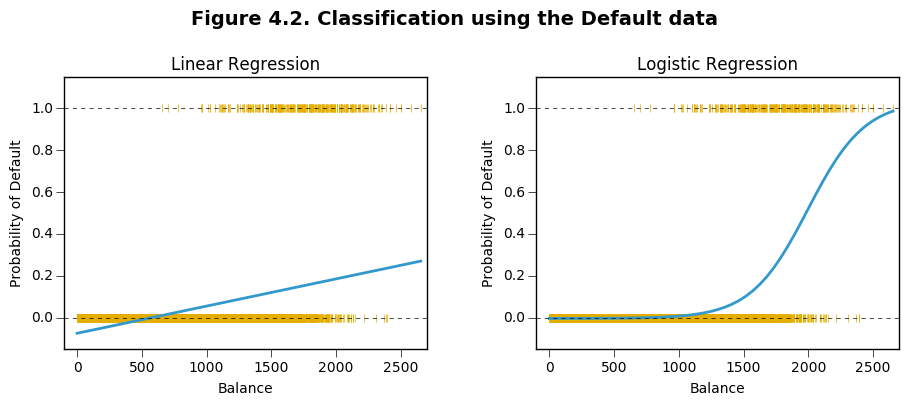

In [37]:
#New figure
fig = plt.figure(figsize=(10,4.5))
fig.suptitle('Figure 4.2. Classification using the Default data', fontsize=14, fontweight='bold')

#Subplot 1
fig.add_subplot(121)
plt.scatter(data.balance,data.default1,marker='|',c='#e5ad00',s=36,linewidths=0.5)
plt.plot(x,regr.predict(x.reshape(-1,1)),c='#3299CC',linewidth=2)
#Plotting dashed lines y=0 and y=1
plt.plot([-100,2700],[0,0], "k--",dashes=(3,3),linewidth=0.5)
plt.plot([-100,2700],[1,1], "k--",dashes=(3,3),linewidth=0.5)
#Setting range of x and y axes
plt.xlim(-100,2700)
plt.ylim(-0.15,1.15)
#Setting x-label, y-label, and title
plt.xlabel('Balance')
plt.ylabel('Probability of Default')
plt.title('Linear Regression')
plt.tick_params(axis='both',which='both',top='off',right='off',direction='out',length=6)

#Subplot 2
fig.add_subplot(122)
plt.scatter(data.balance,data.default1,marker='|',c='#e5ad00',s=36,linewidths=0.5)
plt.plot(x,sigmoid(x,*popt),c='#3299CC',linewidth=2)
#Plotting dashed lines y=0 and y=1
plt.plot([-100,2700],[0,0], "k--",dashes=(3,3),linewidth=0.5)
plt.plot([-100,2700],[1,1], "k--",dashes=(3,3),linewidth=0.5)
#Setting range of x and y axes
plt.xlim(-100,2700)
plt.ylim(-0.15,1.15)
#Setting x-label, y-label, and title
plt.xlabel('Balance')
plt.ylabel('Probability of Default')
plt.title('Logistic Regression')
plt.tick_params(axis='both',which='both',top='off',right='off',direction='out',length=6)

#Adjusting subplots to figure area
plt.tight_layout(pad=4, w_pad=4)
plt.show()

### Part 3: Simple Linear Regression

1. Make sure you understand all the components of the SLR model Jim showed in class and code the same thing yourself 

2. Generate a separate set of training data (25 points) and validation data (15 poins).  Each data set should have the same amount of irreducible error (random noise term) applied to it

3. Make a plot of the error in the testing data as a function of the random strength. There is no "one answer" for this part, open ended graded based on creativity and quality of results 

4. For the exact example I showed in class, calculate the RSE, SSR, $R^2$, 95% confidence intervals for both $\beta_i$, and evaluate the P-value at 0.05 significance level for $\beta_1$

5. Explain in plain language the meaning of the P-value test 

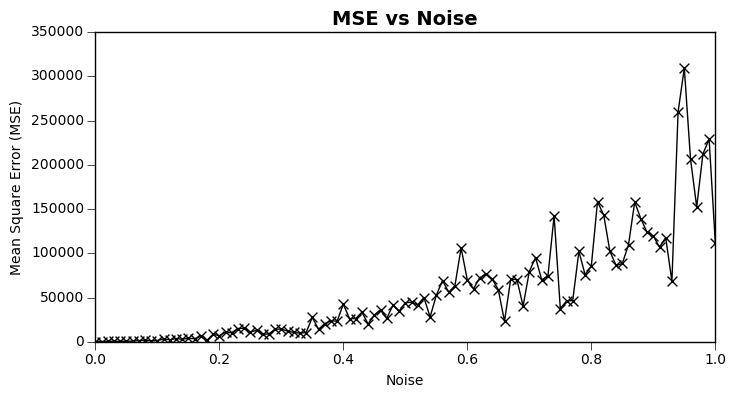

In [72]:
#model: Y = 2X - 3 
pts_training = 25
pts_validation = 15
x_training = np.linspace(-100,100,num=pts_training)
x_validation = np.linspace(-100,100,num=pts_validation)
B0 = -3
B1 = 2
yactual_training = B0 + B1 * x_training
yactual_validation = B0 + B1 * x_validation
yrand_training = yactual_training + 0.25 * (yactual_training.max() - yactual_training.min()) * np.random.normal(size = pts_training)
regr2 = linear_model.LinearRegression()
regr2.fit(x_training.reshape(-1,1),yrand_training)

noise = np.linspace(0,1,101)
error = []
for i in noise:
    yrand_validation = yactual_validation + i * (yactual_validation.max() - yactual_validation.min()) * np.random.normal(size = pts_validation)
    error.append((((regr2.predict(x_validation.reshape(-1,1))-yrand_validation)**2).sum())/pts_validation)
plt.figure(figsize=(8,4))
plt.title('MSE vs Noise', fontsize=14, fontweight='bold')
plt.plot(noise,error,linewidth=1,c='k')
plt.scatter(noise,error,marker='x',c='k',s=50)
plt.xlim([0,1])
plt.ylim([0,350000])
plt.xlabel('Noise')
plt.ylabel('Mean Square Error (MSE)')
plt.tick_params(axis='both',which='both',top='off',right='off',direction='out',length=6)

#### Loading Exact Example shown in Class

B0, B1:  14.5077092554 3.76217657466


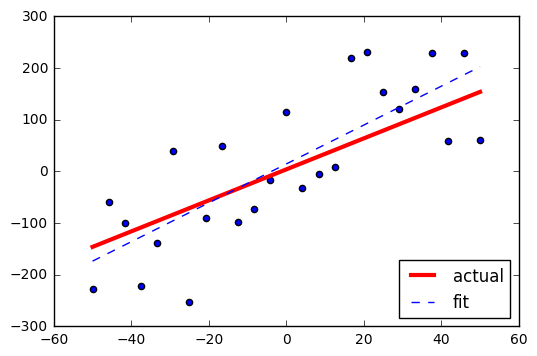

In [39]:
#model: Y = 3X + 4 
pts=25
x=np.linspace(-50,50,num=pts)
B0=4
B1=3
yactual=B0+B1*x
np.random.seed(123)
#Noise scaled to 25% of range to data
yrand=yactual+.25*(yactual.max()-yactual.min())*np.random.normal(size=pts)

#Linear Regression
regr3=linear_model.LinearRegression()
regr3.fit(x.reshape(-1,1),yrand)
print('B0, B1: ',regr3.intercept_, regr3.coef_[0])
y_predict=regr3.predict(x.reshape(-1,1))

#Plots
plt.scatter(x,yrand)
plt.plot(x,yactual,color='red',lw='3',label='actual')
plt.plot(x,y_predict,ls='--',label='fit')
plt.legend(loc='lower right')

In [40]:
#Sum of Squared Residuals (SSR)
SSR = np.sum((yrand - y_predict)**2)
#Residual Standard Error (RSE)
RSE=np.sqrt(SSR/(pts-2))
sigma = RSE
#Total Sum of Squares (TSS)
TSS = np.sum((yrand - yrand.mean())**2)
#R_squared
R_squared = (TSS - SSR)/TSS
x_mean = x.mean()
sx2 = ((x-x_mean)**2).sum()
#Standard Errors
SE0 = np.sqrt(sigma**2 * (1/pts + x_mean**2/sx2))
SE1 = np.sqrt(sigma**2 /sx2)
B0 = regr3.intercept_
B1 = regr3.coef_[0]
#Confidence Interval
CI_B0 = [B0 - 2 * SE0 , B0 + 2 * SE0]
CI_B1 = [B1 - 2 * SE1 , B1 + 2 * SE1]
#p-value
tt=B1/SE1
p_value = stats.t.sf(tt, pts-2)*2

print('Sum of Squared Residuals (SSR) : %f\nResidual Standard Error (RSE) : %f\nR_squared : %f' %(SSR,RSE,R_squared))
print('95%% Confidence Interval of B0 : [%s]' % ', '.join(map(str, CI_B0)))
print('95%% Confidence Interval of B1 : [%s]' % ', '.join(map(str, CI_B1)))
print('p-value for hypothesis test whose null hypothesis is that the slope is zero : %f' %p_value)

Sum of Squared Residuals (SSR) : 191696.692780
Residual Standard Error (RSE) : 91.294243
R_squared : 0.624965
95% Confidence Interval of B0 : [-22.00998797, 51.0254064807]
95% Confidence Interval of B1 : [2.54679414566, 4.97755900365]
p-value for hypothesis test whose null hypothesis is that the slope is zero : 0.000003


#### Meaning of p-value test:

This p-value test is for:

**Null hypothesis:**  
Slope ($\beta_1$) = 0

**Alternate hypothesis:**  
Slope ($\beta_1$) $\neq$ 0

Since the **p-value (0.000003) < significance level (0.05)**, it indicates strong evidence against the null hypothesis. Hence, we **reject the null hypothesis.**

### Part 4: Multiple Linear Regression
1. The code below (next cell) can be plugged into the bottom of the python notebook I gave you with my W7 lecture notes - it is based on the MLSR of the harvard data. Some information: 
    * Your colleague gives you this code makes a 3x1 composite plot  
    * They were trying to look at individual effects ($X_i$) values vs. the PCE to try and understand how important the individual $\beta_i$ are  
    * This approach is clearly wrong, both in concept as well as in code execution. Offer some explanations why. 
    * In CH3 of ISL, the F-test is explained for the multiple linear regression case. Calculate the F-statistics and explain in plain language the conclusion
    * Calculate the p-values for each of the $\beta$ values

#### Code from Class

In [73]:
harvard=pd.read_csv('HCEPD_100K.csv')
regr4=linear_model.LinearRegression()
regr4.fit(harvard[['mass','voc','e_lumo_alpha']],harvard.pce)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[  2.32515162e-03   2.27082708e+00  -5.33311066e+00]
-15.7723612311


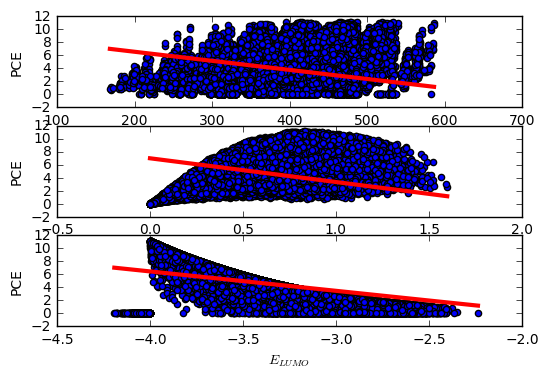

In [42]:
print(regr4.coef_)
print(regr4.intercept_)

# generate matrix X to make predictions of PCE over the X parameter space 
pts=100
X=np.zeros((pts,3))
X[:,0]=np.linspace(harvard.mass.min(),harvard.mass.max(),pts)
X[:,1]=np.linspace(harvard.voc.min(),harvard.voc.max(),pts)
X[:,2]=np.linspace(harvard.e_lumo_alpha.min(),harvard.e_lumo_alpha.max(),pts)

# plot the predicted data 
plt.subplot(311)
plt.scatter(harvard.mass,harvard.pce)
plt.plot(X[:,0],regr4.predict(X),color='red',lw='3')
plt.ylabel('PCE')
plt.xlabel('$mass$')

plt.subplot(312)
plt.scatter(harvard.voc,harvard.pce)
plt.plot(X[:,1],regr4.predict(X),color='red',lw='3')
plt.ylabel('PCE')
plt.xlabel('$VOC$')

plt.subplot(313)
plt.scatter(harvard.e_lumo_alpha,harvard.pce)
plt.plot(X[:,2],regr4.predict(X),color='red',lw='3')
plt.ylabel('PCE')
plt.xlabel('$E_{LUMO}$')

**Concept**
* In order to look at the individual effect of a predictor variable on the PCE value, all the other predictors must be kept constant. 
* This can be done by first computing the *F-statistic* and the associated *p-values*. 
* *Variable selection* can also be done to observe the individual effects of each predictor.

**Code**
* The plots do not provide any insight into the individual effects each predictor had on PCE. The importance on each $\beta$ value remains inconclusive.
* The plots could have been made better by using `tight_layout()` and other markers.

In [43]:
p=3
n=harvard.shape[0]
pce_predict = regr4.predict(harvard[['mass','voc','e_lumo_alpha']])
TSS = np.sum((harvard.pce - harvard.pce.mean())**2)
RSS = np.sum((harvard.pce - pce_predict)**2)
F = ((TSS-RSS)/p)/(RSS/(n-p-1))
print('F-statistic: %f' %F)

F-statistic: 141191.424221


The F-statistic is used to carry out the hypothesis test for:  

**Null hypothesis:**  
$\beta_1 = \beta_2 = \beta_3 = ... = \beta_p = 0$  

**Alternate hypothesis:**  
Atleast one $\beta$ is non zero  

Here, as the F-statistic is much **greater than 1** (141191.424221 to be precise), it provides compelling evidence to **reject the null hypothesis**. It suggests that **at least one** of the predictors (mass, voc, or e_lumo_alpha) is related to PCE.

In [44]:
import statsmodels.api as sm

df_adv = pd.read_csv('HCEPD_100K.csv')
X = df_adv[['mass', 'voc', 'e_lumo_alpha']]
y = df_adv['pce']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pce   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 1.412e+05
Date:                Wed, 22 Feb 2017   Prob (F-statistic):               0.00
Time:                        21:56:48   Log-Likelihood:            -1.3175e+05
No. Observations:               99999   AIC:                         2.635e+05
Df Residuals:                   99995   BIC:                         2.636e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.7724      0.034   -470.483      0.000     -15.838     -15.707
mass             0.0023   5.86e-05     39.660      0.000       0.002       0.002
voc              2.2708      0.012    197.299      0.000       2.248       2.293
e_lumo_alpha    -5.3331      0.011   -478.490      0.000      -5.355      -5.311
==============================================================================
Omnibus:                    59993.074   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1174553.381
Skew:                          -2.527   Prob(JB):                         0.00
Kurtosis:                      19.011   Cond. No.                     4.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
print('p-value for constant: %f' %est.pvalues[0])
print('p-value for mass: %f' %est.pvalues[1])
print('p-value for voc: %f' %est.pvalues[2])
print('p-value for e_lumo_alpha: %f' %est.pvalues[3])

p-value for constant: 0.000000
p-value for mass: 0.000000
p-value for voc: 0.000000
p-value for e_lumo_alpha: 0.000000


### Part 5: Resampling methods 

I would like you to write a clearly labeled function that performs bootstrapping using a subset of the HCEPD_100K.csv data. Your function should be versatile in terms of how much of the data is selected for the bootstrap and and how many iterations are run.  

1. Prepare a plot of MSE (using the same 3-parameter PCE fit (using mass/VOC/lumo features). The x-axis should be the number of bootstrap samples and the y-axis should be the MSE. You should show a line for boostrap samples sizes of 100, 1000, and 5000.  
    
2. For the same sampling you should show a plot the estimate of the three relevant beta coefficients 
    

In [46]:
def bootstrapping(dataframe, sample_size_range, predictors, target):
    """
    Function for resampling with replacement
    Parameters:
    dataframe: pandas data frame
               Dataframe on which resampling is to be done
    sample_size_range: list of integers
                       list of sample sizes of samples
    predictors: list of strings
                list of predicted variables
    target: string
            target variable
    """
    regr = linear_model.LinearRegression()
    #Initializing lists
    beta = [[] for i in range((len(predictors)+1))]
    MSE=[]
    for i in sample_size_range:
        #Resampling
        sample = utils.resample(dataframe,n_samples=i)
        regr.fit(sample[predictors],sample[target])
        for j in range(len(predictors)):
            beta[j].append(regr.coef_[j])
        beta[-1].append(regr.intercept_)
        predict = regr.predict(sample[predictors])
        MSE.append((((sample.pce - predict)**2).sum())/i)
    return MSE,beta

In [52]:
#Specifying variables for bootstrapping function
target = 'pce'
predictors = ['mass','voc','e_lumo_alpha']
size = range(1,6000)
MSE,beta = bootstrapping(harvard,size,predictors,target)
a=(((harvard[target] - regr4.predict(harvard[predictors]))**2).sum())/len(harvard)

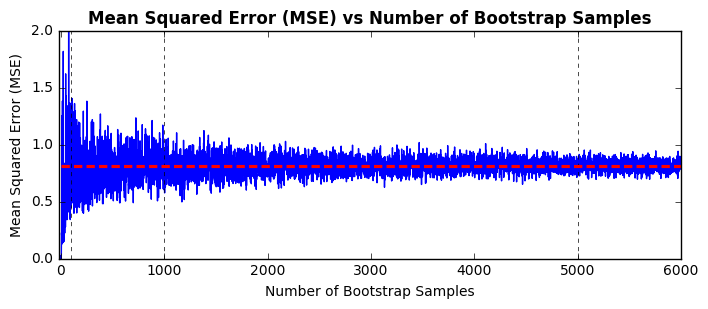

In [54]:
#Plot
plt.figure(figsize=(8,4))
plt.title('Mean Squared Error (MSE) vs Number of Bootstrap Samples', fontsize=12, fontweight='bold')

plt.plot(size,MSE)
plt.plot([100,100],[0,10], "k--",dashes=(3,3),linewidth=0.5)
plt.plot([1000,1000],[0,10], "k--",dashes=(3,3),linewidth=0.5)
plt.plot([5000,5000],[0,10], "k--",dashes=(3,3),linewidth=0.5)
plt.plot([0,6000],[a,a], "--",dashes=(6,3),linewidth=2.25,c='r', )

plt.xlim(-20,6000)
plt.ylim(0,2)

plt.xlabel('Number of Bootstrap Samples')
plt.ylabel('Mean Squared Error (MSE)')

plt.tight_layout(pad=4, w_pad=4, h_pad=4)
plt.show()

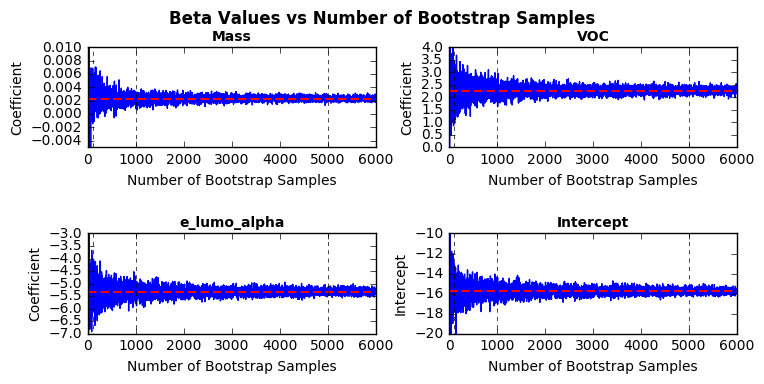

In [58]:
#Plot
plt.figure(figsize=(8,4))
plt.suptitle('Beta Values vs Number of Bootstrap Samples', fontsize=12, fontweight='bold')

#Subplot 1
plt.subplot(221)
plt.title('Mass',fontsize = 10, fontweight='bold')
plt.plot(size,beta[0])
plt.plot([0,6000],[regr4.coef_[0],regr4.coef_[0]], "--",dashes=(6,3),linewidth=1.5,c='r', )
plt.plot([100,100],[-0.005,0.01], "k--",dashes=(3,3),linewidth=0.5)
plt.plot([1000,1000],[-0.005,0.01], "k--",dashes=(3,3),linewidth=0.5)
plt.plot([5000,5000],[-0.005,0.01], "k--",dashes=(3,3),linewidth=0.5)
plt.xlabel('Number of Bootstrap Samples', fontsize=10)
plt.ylabel('Coefficient', fontsize=10)
plt.ylim(-0.005,0.01)

#Subplot 2
plt.subplot(222)
plt.title('VOC', fontsize=10, fontweight='bold')
plt.plot(size,beta[1])
plt.plot([0,6000],[regr4.coef_[1],regr4.coef_[1]], "--",dashes=(6,3),linewidth=1.5,c='r')
plt.plot([100,100],[0,4], "k--",dashes=(3,3),linewidth=0.5)
plt.plot([1000,1000],[0,4], "k--",dashes=(3,3),linewidth=0.5)
plt.plot([5000,5000],[0,4], "k--",dashes=(3,3),linewidth=0.5)
plt.xlabel('Number of Bootstrap Samples', fontsize=10)
plt.ylabel('Coefficient', fontsize=10)
plt.ylim(0,4)

#Subplot 3
plt.subplot(223)
plt.title('e_lumo_alpha', fontsize=10, fontweight='bold')
plt.plot(size,beta[2])
plt.plot([0,6000],[regr4.coef_[2],regr4.coef_[2]], "--",dashes=(6,3),linewidth=1.5,c='r')
plt.plot([100,100],[-3,-7], "k--",dashes=(3,3),linewidth=0.5)
plt.plot([1000,1000],[-3,-7], "k--",dashes=(3,3),linewidth=0.5)
plt.plot([5000,5000],[-3,-7], "k--",dashes=(3,3),linewidth=0.5)
plt.xlabel('Number of Bootstrap Samples', fontsize=10)
plt.ylabel('Coefficient', fontsize=10)
plt.ylim(-7,-3)

#Subplot 4
plt.subplot(224)
plt.title('Intercept', fontsize=10, fontweight='bold')
plt.plot(size,beta[3])
plt.plot([0,6000],[regr4.intercept_,regr4.intercept_], "--",dashes=(6,3),linewidth=1.5,c='r')
plt.plot([100,100],[-10,-20], "k--",dashes=(3,3),linewidth=0.5)
plt.plot([1000,1000],[-10,-20], "k--",dashes=(3,3),linewidth=0.5)
plt.plot([5000,5000],[-10,-20], "k--",dashes=(3,3),linewidth=0.5)
plt.xlabel('Number of Bootstrap Samples', fontsize=10)
plt.ylabel('Intercept', fontsize=10)
plt.ylim(-20,-10)

plt.tight_layout(pad=2, w_pad=0)
plt.show()